In [29]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.ensemble import IsolationForest

In [30]:
#jwddf = pd.read_csv('D:/data/sun/dbscan/jwd_all.csv')
jwddf = pd.read_csv('D:/data/sun/dbscan/out1.csv')
jwddf_groupby = jwddf.groupby(by = 'xq_code')
xq_codes = list(jwddf_groupby.groups.keys())

In [31]:
def showAllPointImage(jwd,xq_code):
    plt.scatter(jwd['pre_night_longitude'], jwd['pre_night_latitude'], c="red", marker='.', label=xq_code) 
    plt.xlabel('longitude')  
    plt.ylabel('latitude')  
    plt.legend(loc=2)  
    plt.show() 
    
def calIsolationPoint(jwd,xq_code):
    clf = IsolationForest(n_estimators=100,max_samples=200, max_features=2)
    table = pd.concat([jwd.loc[:,['pre_night_longitude','pre_night_latitude']]], axis=1)
    clf.fit(table)
    output_table = pd.DataFrame(clf.predict(table))
    #test_df = output_table.iloc[lambda x: x.values[:,0] == 1]
    
    test_df = jwd[output_table.values[:,0] == 1]
    iso_point = jwd[output_table.values[:,0] == -1]
    return test_df,iso_point

def showClusterImage(core_member,noise_member):
    plt.plot(core_member['pre_night_longitude'], core_member['pre_night_latitude'], '+', markersize=6)
    plt.plot(noise_member['pre_night_longitude'], noise_member['pre_night_latitude'], '.', markersize=6)
    plt.show()  

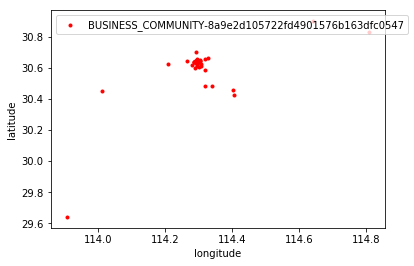

D:\Program\python\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
D:\Program\python\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Program\python\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:250: UserWarning: max_samples (200) is greater than the total number of samples (70). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))
D:\Program\python\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


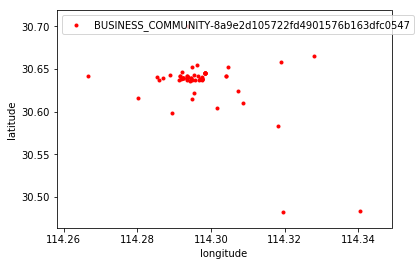

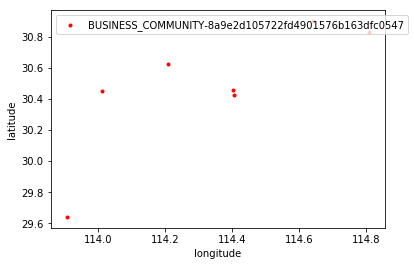

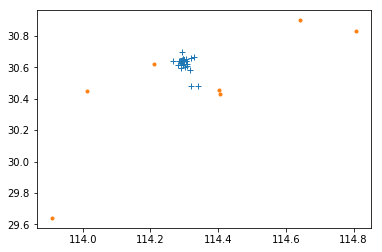

jwd= 70 calpoint= 63 ,:isopoint= 7


In [32]:
for xq_code in xq_codes:
    if xq_code == 'BUSINESS_COMMUNITY-8a9e2d105722fd4901576b163dfc0547':
        jwd = jwddf.loc[jwddf['xq_code']==xq_code]
        showAllPointImage(jwd,xq_code)
        calpoint,isopoint = calIsolationPoint(jwd,xq_code)
        showAllPointImage(calpoint,xq_code)
        showAllPointImage(isopoint,xq_code)
        showClusterImage(calpoint,isopoint)
        print('jwd=',jwd.shape[0],'calpoint=',calpoint.shape[0],',:isopoint=',isopoint.shape[0])